### Run exo 2 sur vraie machine

In [46]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram

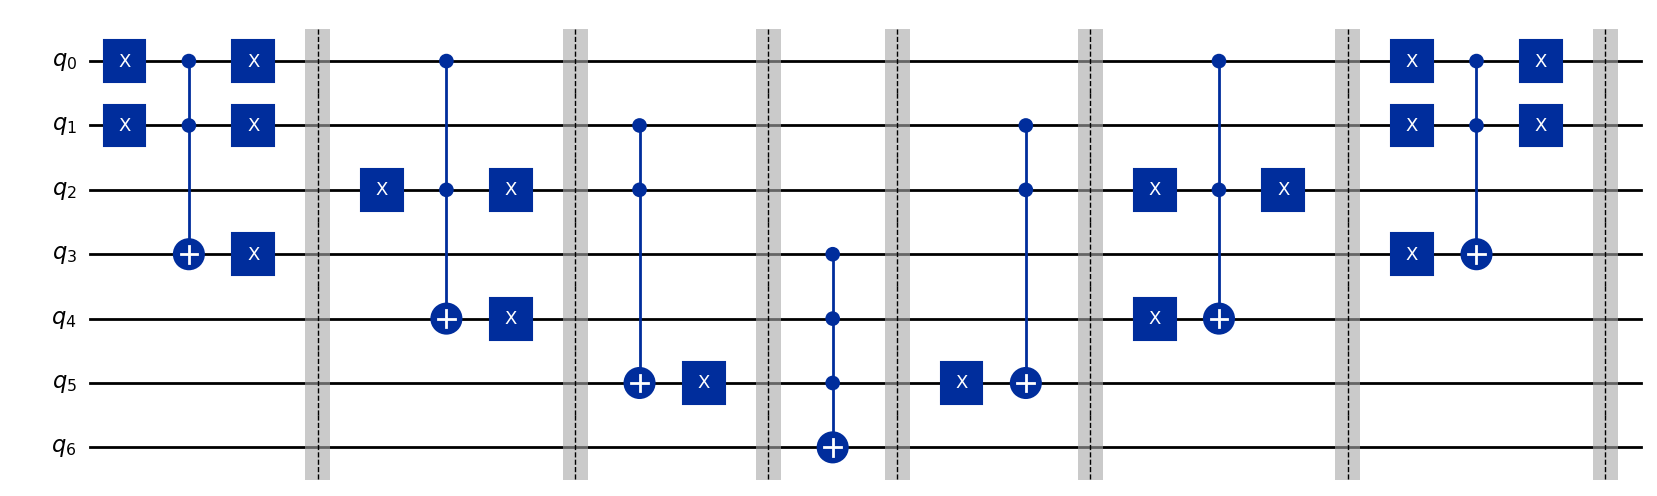

In [47]:
Uf = QuantumCircuit(7, name='Uf')

Uf.x([0,1])
Uf.ccx(0,1,3)
Uf.x(3)
Uf.x([0,1])
Uf.barrier()

Uf.x(2)
Uf.ccx(0,2,4)
Uf.x(4)
Uf.x(2)
Uf.barrier()

Uf.ccx(1,2,5)
Uf.x(5)
Uf.barrier()

Uf.mcx([3,4,5],6)
Uf.barrier()

Uf.x(5)
Uf.ccx(1,2,5)
Uf.barrier()

Uf.x(2)
Uf.x(4)
Uf.ccx(0,2,4)
Uf.x(2)
Uf.barrier()

Uf.x([0,1])
Uf.x(3)
Uf.ccx(0,1,3)
Uf.x([0,1])
Uf.barrier()

Uf.draw('mpl')



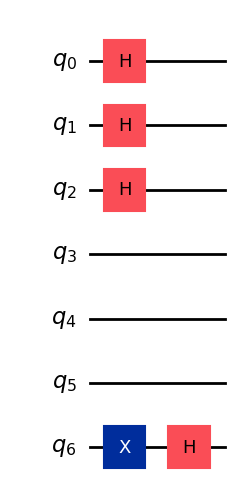

In [48]:
Stateprep = QuantumCircuit(7, name='Stateprep')
Stateprep.h([0,1,2])
Stateprep.x(6)
Stateprep.h(6)

Stateprep.draw('mpl')

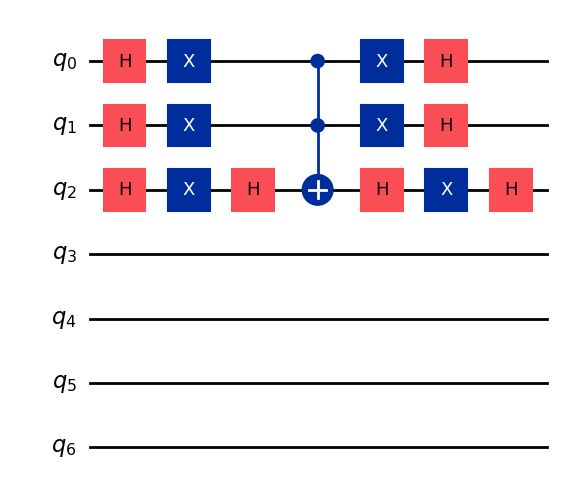

In [49]:
R = QuantumCircuit(7, name = 'Reflextion')
R.h([0,1,2])
R.x([0,1,2])
R.h(2)
R.mcx([0,1],2)
R.h(2)
R.x([0,1,2])
R.h([0,1,2])
R.draw('mpl')

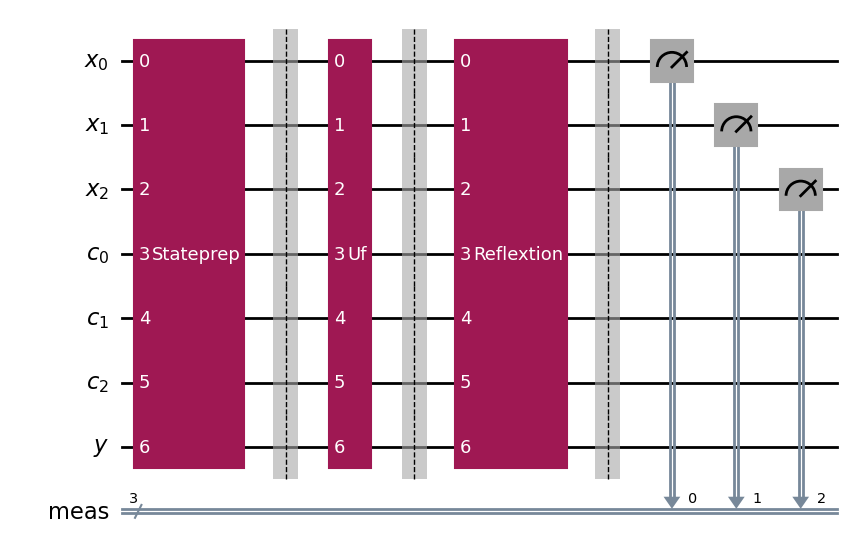

In [50]:
##We are now ready to run Grover algo
#First we try one G operator
from qiskit import QuantumRegister, ClassicalRegister

##First we create the circuit, we use 3 register, 1 for the variables, 1 for the clauses and 1 for y where we will stock f
Vars = QuantumRegister(size=3, name='x')
Clauses = QuantumRegister(size=3, name='c')
y = QuantumRegister(size=1, name='y')
meas = ClassicalRegister(size=3, name='meas')
QC = QuantumCircuit(Vars, Clauses, y, meas)
QC.draw('mpl')
QC.append(Stateprep, [0,1,2,3,4,5,6])
QC.barrier()
QC.append(Uf, [0,1,2,3,4,5,6])
QC.barrier()
QC.append(R, [0,1,2,3,4,5,6])
QC.barrier()
QC.measure(0,0)
QC.measure(1,1)
QC.measure(2,2)
QC.draw('mpl')

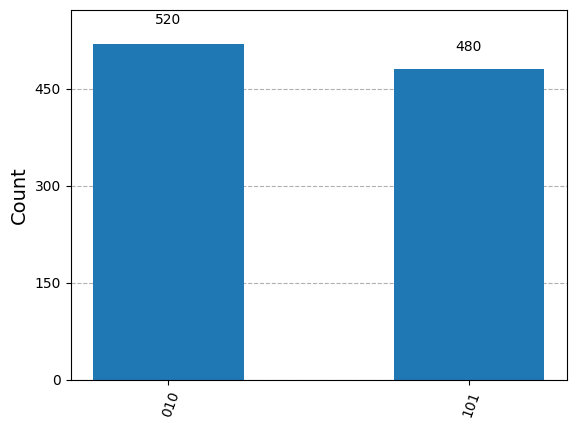

In [51]:
from qiskit_aer import AerSimulator

simulator = AerSimulator()
transpiled_circuit = transpile(QC, simulator)
job = simulator.run(transpiled_circuit, shots=1000)
result = job.result()  # obtain results of a run
counts = result.get_counts()
plot_histogram(counts)

In [52]:
def f(x): #To check
    f = x[0] or x[1]
    f = f and (not(x[0]) or x[2])
    f = f and (not(x[1]) or not(x[2]))
    return f

In [53]:
from itertools import product
combinations = list(product([0, 1], repeat=3))

for comb in combinations:
    if f(comb) is True:
        print(comb)

(0, 1, 0)
(1, 0, 1)


In [54]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()

In [55]:
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=6) 
print(backend.name)

ibm_sherbrooke


In [56]:
from qiskit import transpile
qc_transpiled = transpile(QC, backend, optimization_level=2)
qc_transpiled.count_ops()

OrderedDict([('rz', 437),
             ('sx', 250),
             ('ecr', 117),
             ('x', 28),
             ('barrier', 10),
             ('measure', 3)])

In [57]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

sampler = Sampler(backend=backend)
qc_job = sampler.run([qc_transpiled], shots=1000) 

/var/folders/c4/sgxdk2g56dx90j4nw9824_sw0000gn/T/ipykernel_37329/371822806.py:3: DeprecationWarning: The 'backend' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  sampler = Sampler(backend=backend)


In [58]:
job_id = qc_job.job_id() 

In [59]:
job = service.job(job_id)
job_result = job.result() 

In [60]:
qc_transpiled.cregs 

[ClassicalRegister(3, 'meas')]

In [61]:
counts = job_result[0].data.meas.get_counts() 

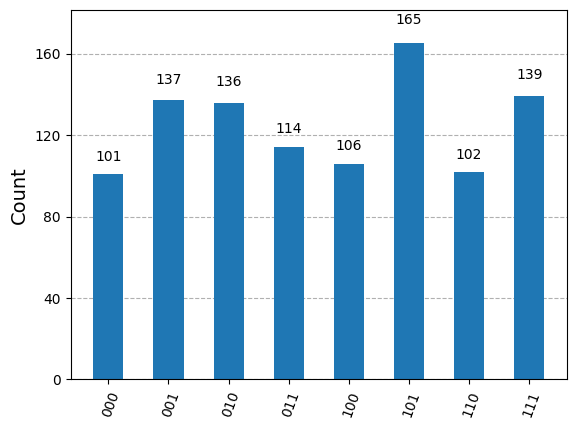

In [62]:
plot_histogram(counts)

### Run de l'exo 1 sur une vraie machine

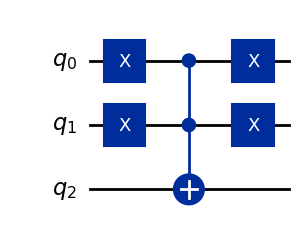

In [30]:
Uf = QuantumCircuit(3, name='Uf')

Uf.x([0,1])
Uf.ccx(0,1,2)
Uf.x([0,1])

Uf.draw('mpl')

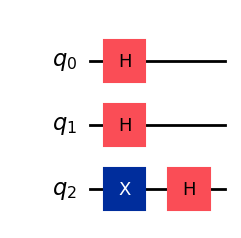

In [31]:
Stateprep = QuantumCircuit(3, name='Stateprep')
Stateprep.h([0,1])
Stateprep.x(2)
Stateprep.h(2)

Stateprep.draw('mpl')

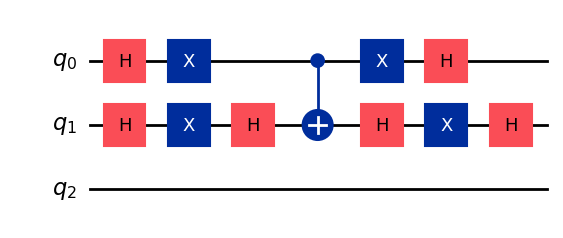

In [34]:
R = QuantumCircuit(3, name = 'Reflextion')
R.h([0,1])
R.x([0,1])
R.h(1)
R.cx(0,1)
R.h(1)
R.x([0,1])
R.h([0,1])
R.draw('mpl')

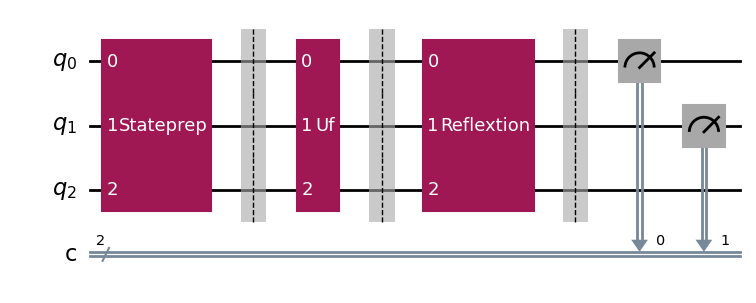

In [35]:
##We are now ready to run Grover algo
#First we try one G operator
from qiskit import QuantumRegister, ClassicalRegister

##First we create the circuit, we use 3 register, 1 for the variables, 1 for the clauses and 1 for y where we will stock f
QC = QuantumCircuit(3, 2)
QC.append(Stateprep, [0,1,2])
QC.barrier()
QC.append(Uf, [0,1,2])
QC.barrier()
QC.append(R, [0,1,2])
QC.barrier()
QC.measure(0,0)
QC.measure(1,1)
QC.draw('mpl')

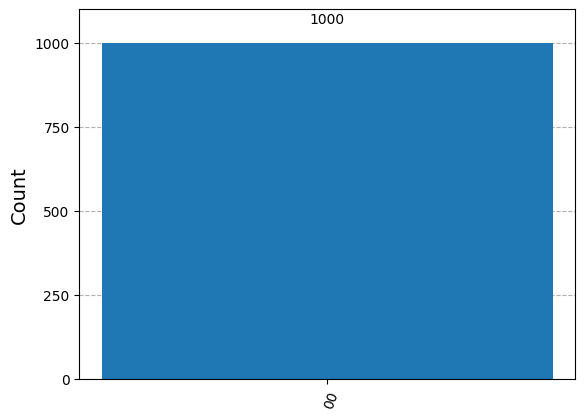

In [36]:
from qiskit_aer import AerSimulator

simulator = AerSimulator()
transpiled_circuit = transpile(QC, simulator)
job = simulator.run(transpiled_circuit, shots=1000)
result = job.result()  # obtain results of a run
counts = result.get_counts()
plot_histogram(counts)

In [37]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()

In [38]:
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=6) 
print(backend.name)

ibm_sherbrooke


In [39]:
from qiskit import transpile
qc_transpiled = transpile(QC, backend, optimization_level=2)
qc_transpiled.count_ops()

OrderedDict([('rz', 43),
             ('sx', 24),
             ('ecr', 8),
             ('barrier', 3),
             ('x', 3),
             ('measure', 2)])

In [40]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

sampler = Sampler(backend=backend)
qc_job = sampler.run([qc_transpiled], shots=1000) 

/var/folders/c4/sgxdk2g56dx90j4nw9824_sw0000gn/T/ipykernel_37329/371822806.py:3: DeprecationWarning: The 'backend' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  sampler = Sampler(backend=backend)


In [41]:
job_id = qc_job.job_id() 

In [42]:
job = service.job(job_id)
job_result = job.result() 

In [43]:
qc_transpiled.cregs 

[ClassicalRegister(2, 'c')]

In [44]:
counts = job_result[0].data.c.get_counts() 

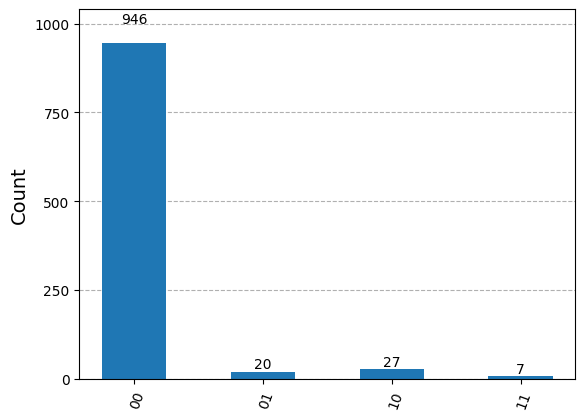

In [45]:
plot_histogram(counts)